In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.shape


(10000, 14)

In [6]:
# drop customer Id , Surname
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [7]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Variable Identification

## Numeric ===> Creditscore , Age, Tenure, Balance, NumOfProducts, EstimatedSalary
## Category ===> Geography, Gender, HasCrCard, IsActiveMember
## Target ===> Exited

In [9]:
numericColumns = ['CreditScore' , 'Age', 'Tenure', 'Balance',  'EstimatedSalary']
categoryColumns = ['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']

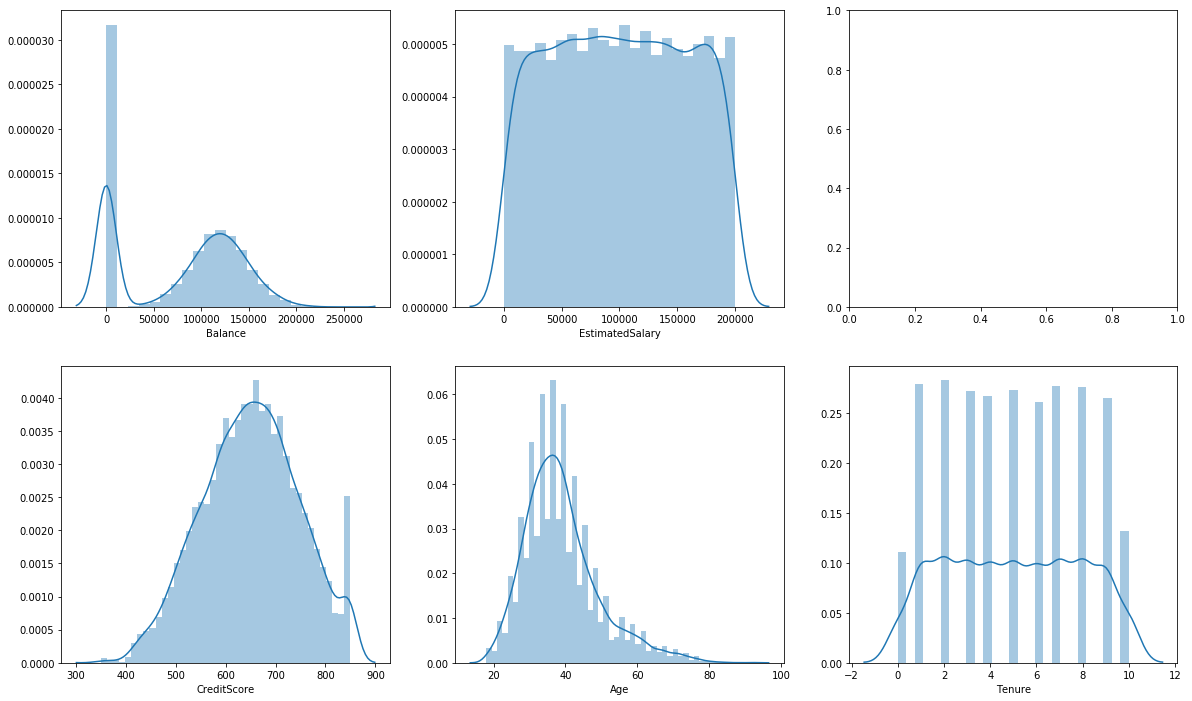

In [10]:
# histogram for numeric columns
#df[numericColumns].hist()

fig,axarr = plt.subplots(2,3,figsize=(20,12))

i=0
for col in numericColumns:
    if(i>2):
        sns.distplot(df[col],ax=axarr[0][i-3])
    else:
        sns.distplot(df[col],ax=axarr[1][i])
    i = i+1

    


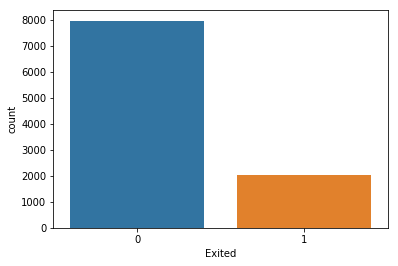

In [11]:
# distribution of Exited column
sns.countplot(df['Exited'])

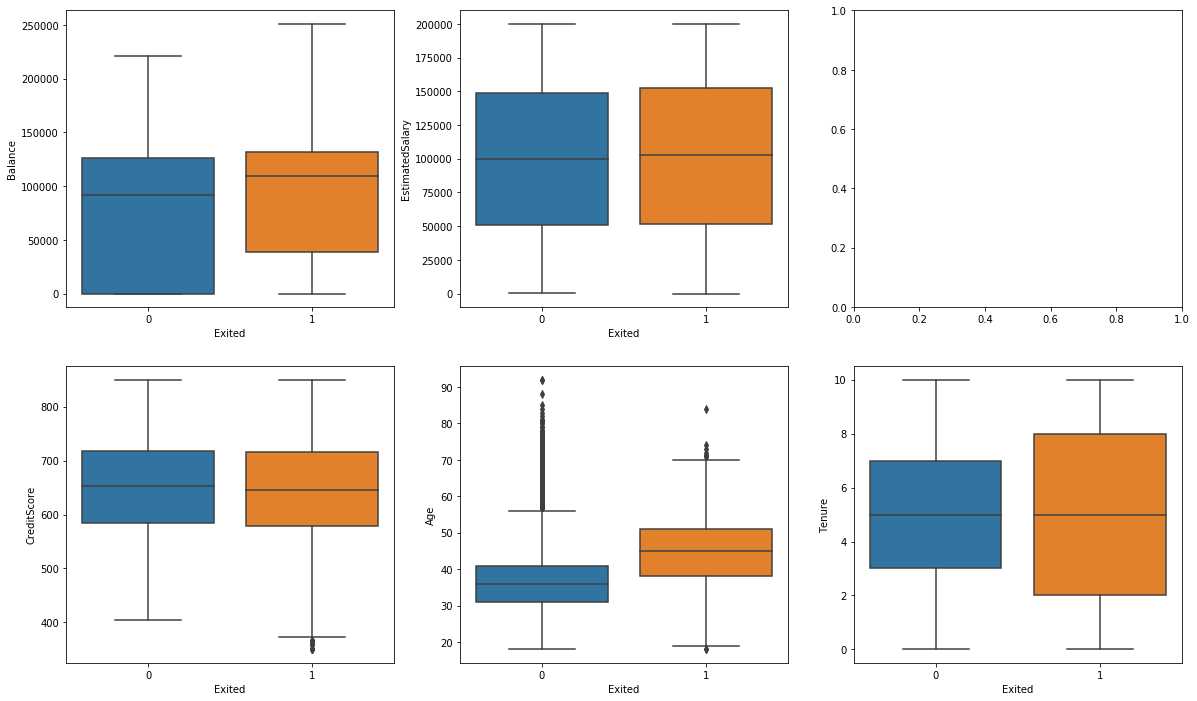

In [12]:
# bivariate analysis for numeric columns

fig,axarr = plt.subplots(2,3,figsize=(20,12))

i=0
for col in numericColumns:
    if(i>2):
        sns.boxplot(df['Exited'],df[col],ax=axarr[0][i-3])
    else:
        sns.boxplot(df['Exited'],df[col],ax=axarr[1][i])
    i = i+1


In [13]:
# Age === > older customers are leaving than younger customers

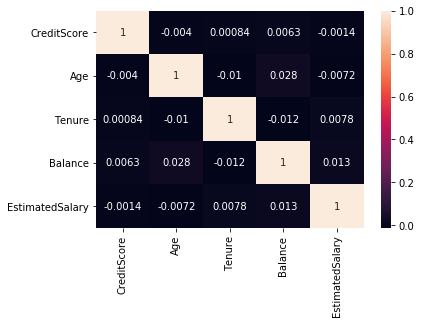

In [14]:
sns.heatmap(df[numericColumns].corr(),annot=True)

In [15]:
### Check for missing values

In [16]:
df[numericColumns].isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
EstimatedSalary    0
dtype: int64

In [17]:
## Check for Outliers

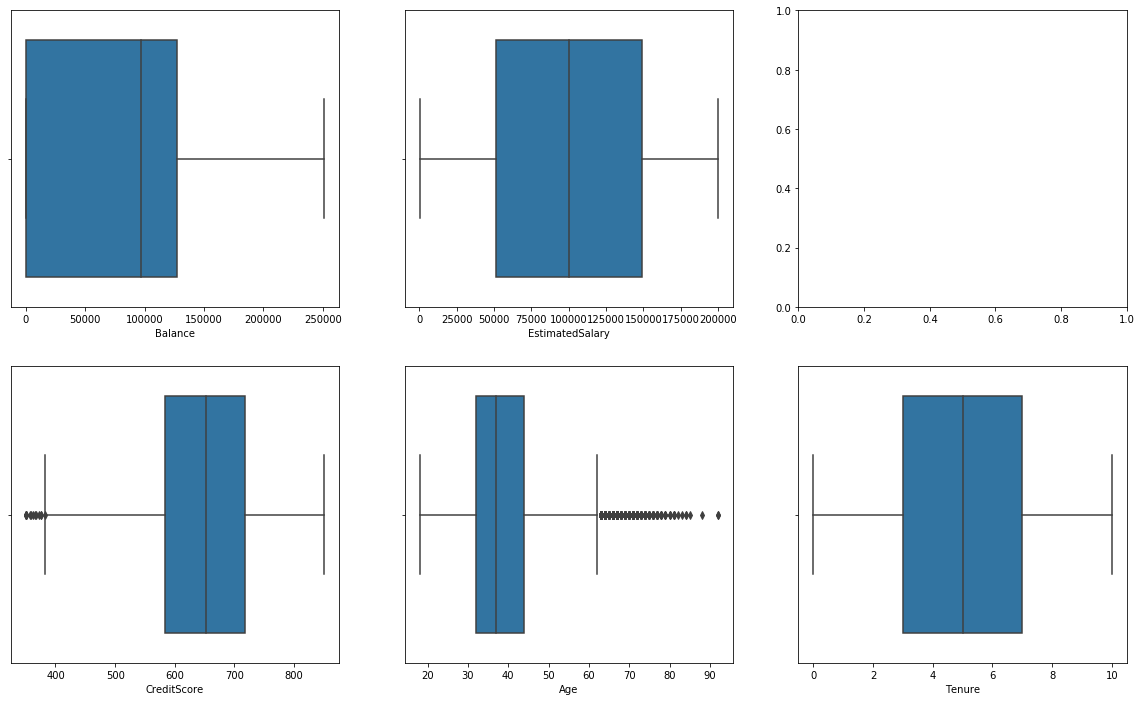

In [18]:
fig, axarr = plt.subplots(2,3,figsize=(20,12))

i=0
for col in numericColumns:
    if(i>2):
        sns.boxplot(df[col],ax=axarr[0][i-3])
    else:
        sns.boxplot(df[col],ax=axarr[1][i])
    i = i+1

In [19]:
## There are outliers for Credit score , Age 

In [20]:

def Get_Outliers(col):

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    whisker1 = max(min(df[col]),(q1-1.5*IQR))
    whisker2 = min(max(df[col]),(q3+1.5 * IQR))

    return df[(df[col]<whisker1) | (df[col]>whisker2)]['Age']

In [21]:
age_outliers = Get_Outliers('Age')
creditscore_outliers = Get_Outliers('CreditScore')

In [22]:
print(len(age_outliers) , len(creditscore_outliers))

359 15


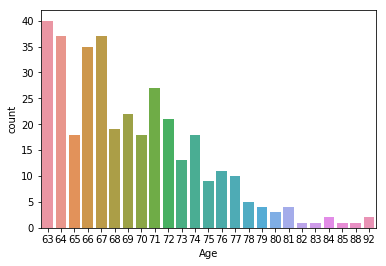

In [23]:
sns.countplot(age_outliers)

In [24]:
### Dealing with Skewness

from scipy.stats import boxcox

In [25]:
## Scaling the data
from sklearn.preprocessing import MinMaxScaler , StandardScaler

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([-1.994869  , -1.28928771, -0.58370642,  0.12187487,  0.82745615,
         1.53303744,  2.23861873,  2.94420002,  3.64978131,  4.3553626 ,
         5.06094389]),
 <a list of 10 Patch objects>)

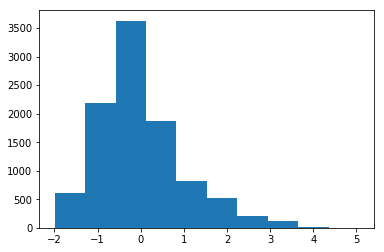

In [26]:
df['Age'] = (df['Age'] - df["Age"].mean())/df["Age"].std()     ### Standard Scaling

plt.hist(df['Age'])

In [27]:
df['CreditScore'] = (df['CreditScore'] - df["CreditScore"].mean())/df["CreditScore"].std()     ### Standard Scaling
#df['Balance'] = (df['Balance'] - df["Balance"].mean())/df["Balance"].std()     ### Standard Scaling



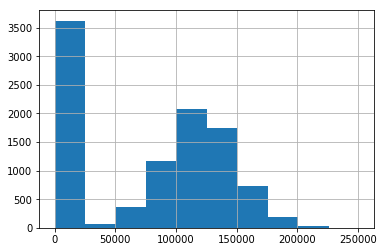

In [28]:
df['Balance'].hist()

In [29]:
# Standard Scaling Age , CreditScore

In [30]:
from scipy.stats import skew

In [31]:
print(skew(df['Balance']),skew(df['EstimatedSalary']),skew(df['Tenure']))

-0.14108754375291138 0.0020850448448748848 0.010989809189781041


In [32]:
df['Balance'] = (df['Balance'] - df["Balance"].mean())/df["Balance"].std()     ### Standard Scaling
#df['EstimatedSalary'] = (df['EstimatedSalary'] - df["EstimatedSalary"].mean())/df["EstimatedSalary"].std()  ### Standard Scaling
#df['Tenure'] = (df['Tenure'] - df["Tenure"].mean())/df["Tenure"].std()     ### Standard Scaling




In [34]:
### Here EstimatedSalary and Tenure are unformly ditributed ... 

In [91]:
df['EstimatedSalary'] =  (df['EstimatedSalary'] - df['EstimatedSalary'].min())/(df['EstimatedSalary'].max()-df['EstimatedSalary'].min())
df['Tenure'] =  (df['Tenure'] - df['Tenure'].min())/(df['Tenure'].max()-df['Tenure'].min())



In [92]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,-0.326205,France,Female,0.293503,0.2,-1.225786,1,1,1,0.506735,1
1,2,-0.440014,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.562709,0
2,3,-1.536717,France,Female,0.293503,0.8,1.332987,3,1,0,0.569654,1
3,4,0.501496,France,Female,0.007456,0.1,-1.225786,2,0,0,0.469120,0
4,5,2.063781,Spain,Female,0.388852,0.2,0.785689,1,1,1,0.395400,0


In [93]:
## Dealing with category columns

In [94]:
df[categoryColumns].head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,1,1,1
1,Spain,Female,1,0,1
2,France,Female,3,1,0
3,France,Female,2,0,0
4,Spain,Female,1,1,1


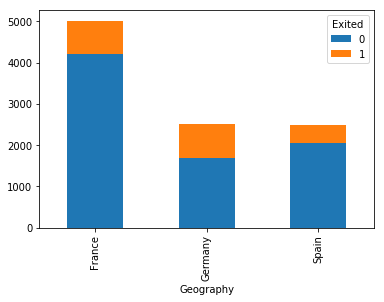

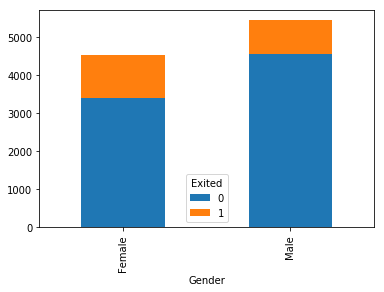

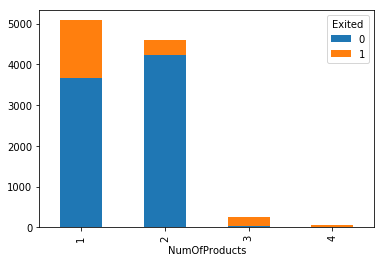

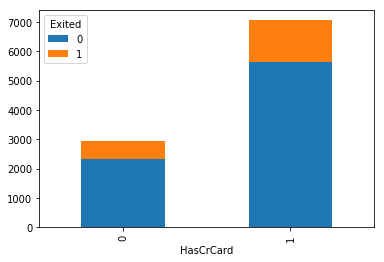

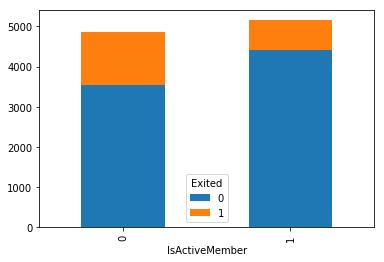

In [111]:

for col in categoryColumns:
    pivot = pd.crosstab(df[col],df.Exited)
    pivot.plot.bar(stacked=True)

In [112]:
# If no of products are >2 are laways likely to stay with the bank
# Males are likley to leave compared to females
# France people are likely to leave compared to other regions
# Those who are holding Credit card are leaving. relative measures to be taken

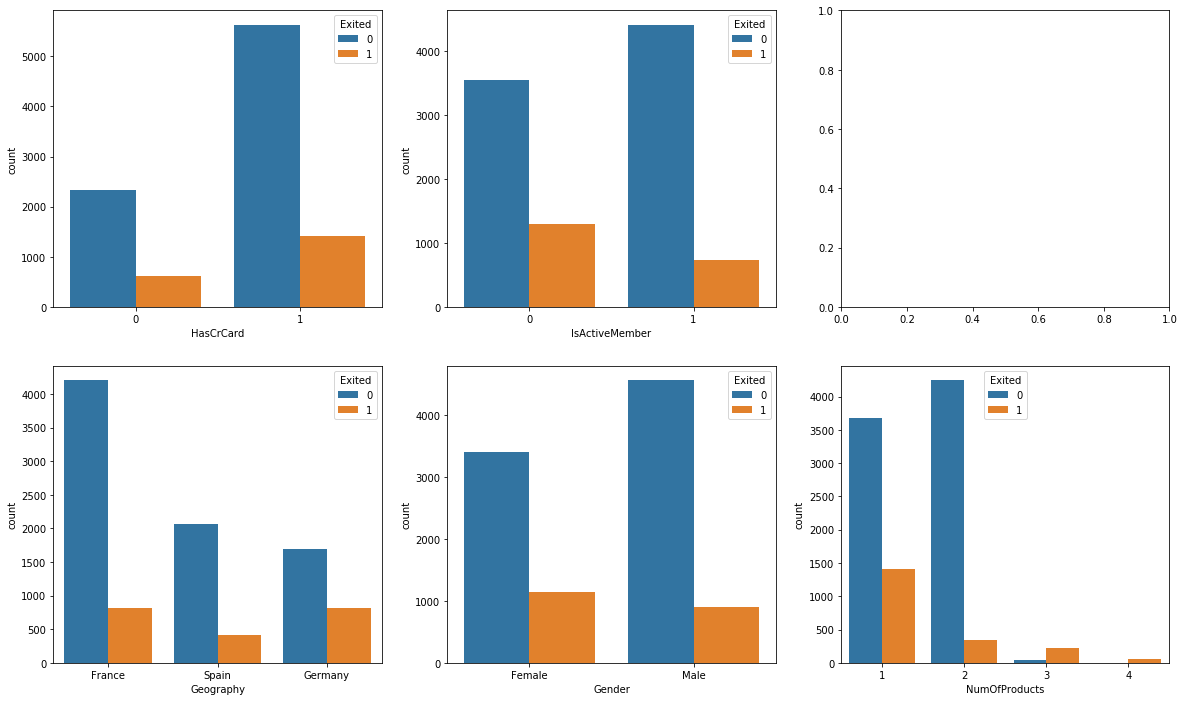

In [114]:
fig, axarr = plt.subplots(2,3,figsize=(20,12))

i=0
for col in categoryColumns:
    if(i>2):
        sns.countplot(df[col],hue=df['Exited'],ax=axarr[0][i-3])
    else:
        sns.countplot(df[col],hue =df['Exited'],ax=axarr[1][i])
    i = i+1

In [116]:
df.to_csv('Feature_Engineering.csv',index=False)